In [15]:
!pip install catboost
import warnings
import requests
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt


# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV


# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#machine learning Algorithms For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier



In [ ]:
shared_link = 'https://drive.google.com/file/d/1OebtXolWNXVsNkLIpISyL-fjT7AR7G9e/view?usp=drive_link'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Titanic_train.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Titanic_train.csv')
data.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data .info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical using one-hot encoding
categorical_cols = ['Sex', 'Embarked']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


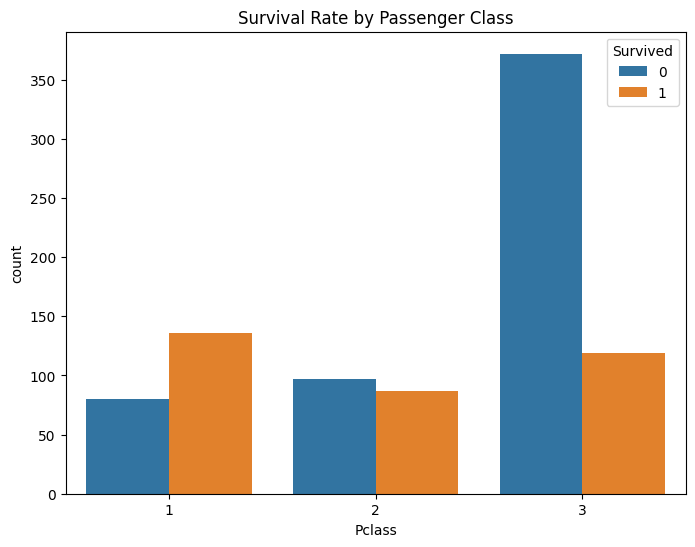

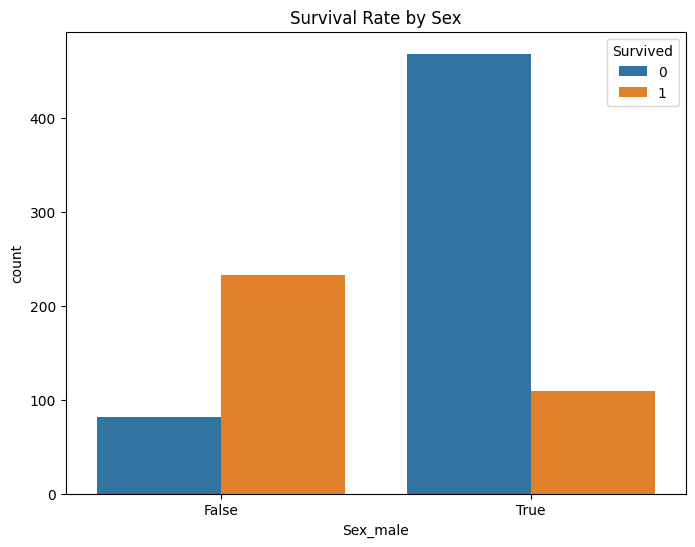

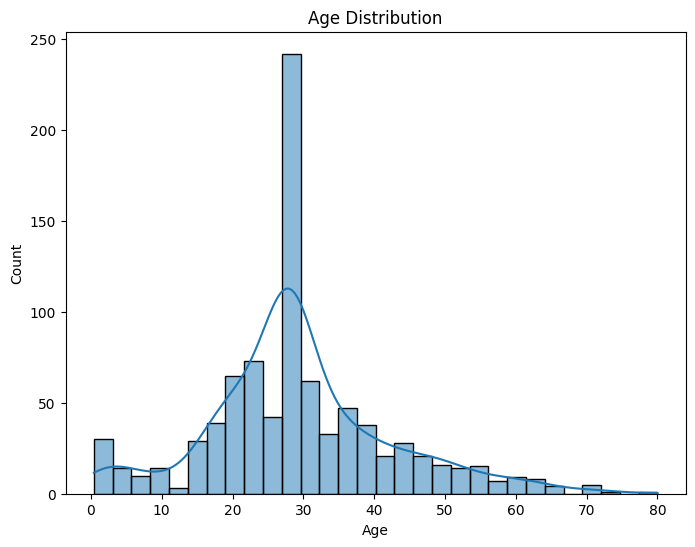

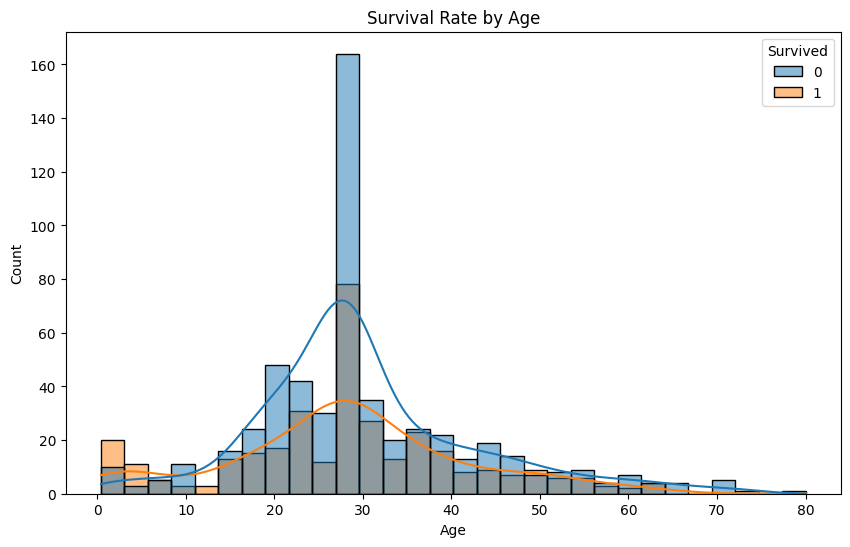

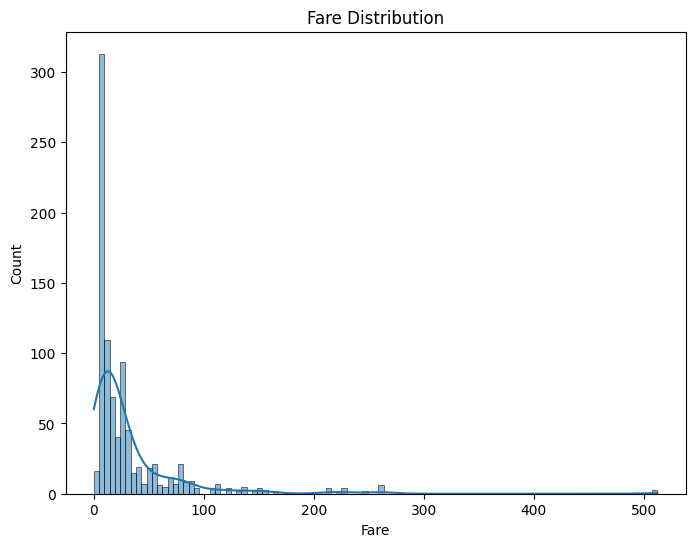

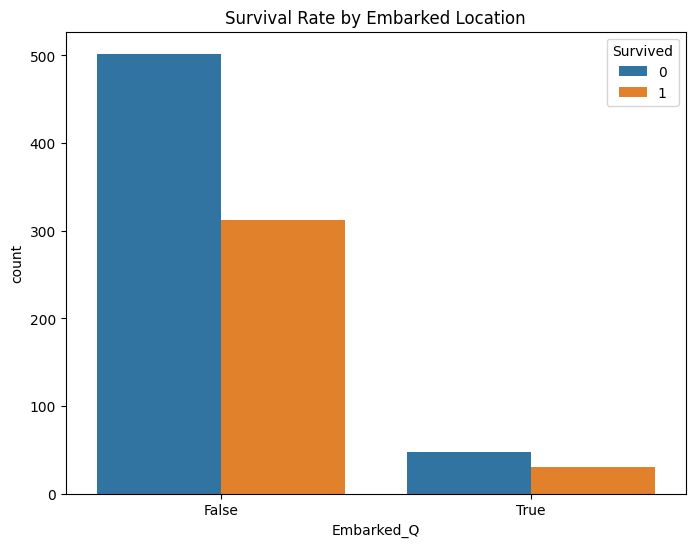

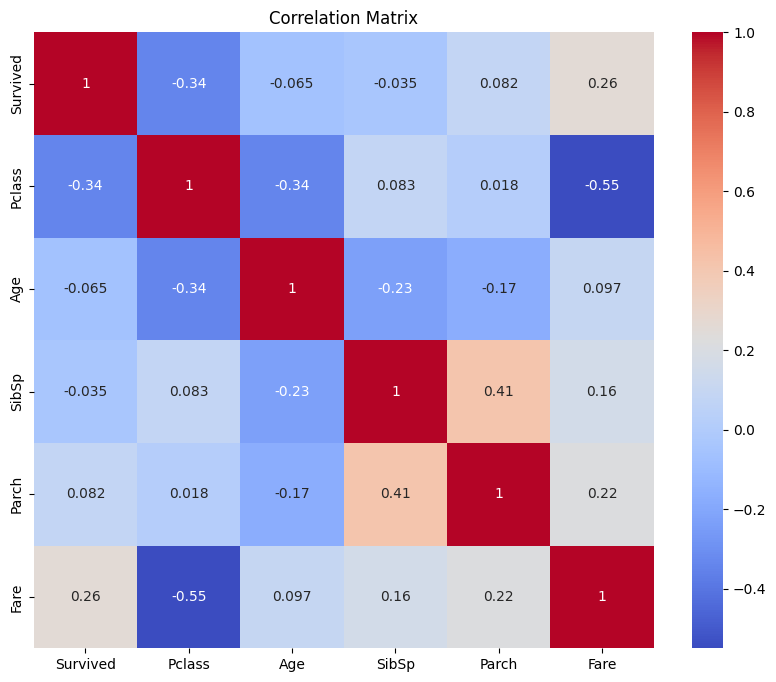

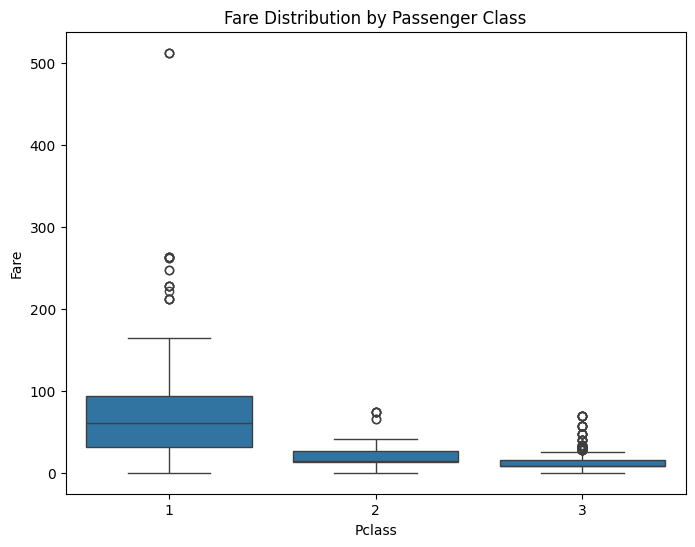

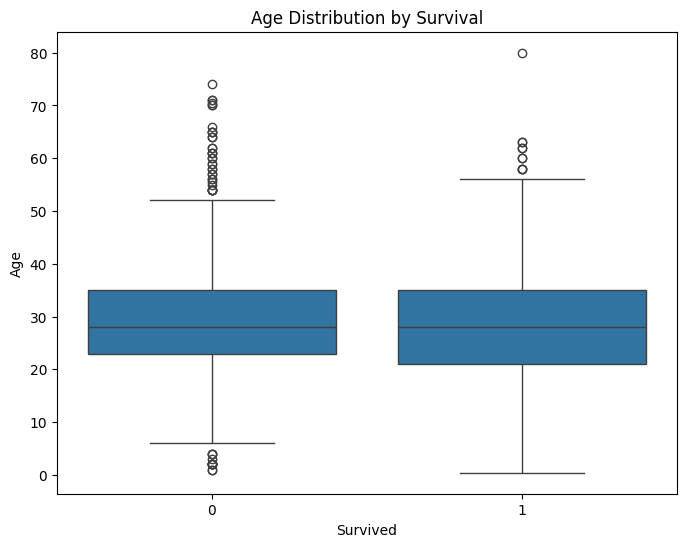

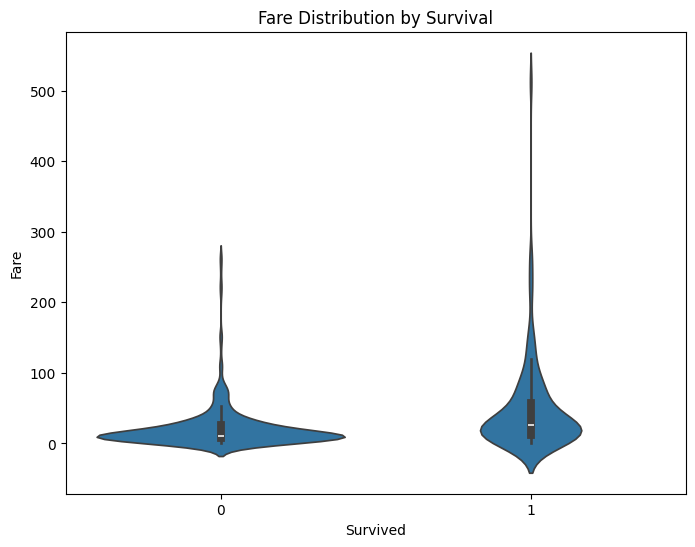

In [ ]:
# 1. Survival Rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# 2. Survival Rate by Sex
plt.figure(figsize=(8, 6))
# The original 'Sex' column is now 'Sex_male' after one-hot encoding
sns.countplot(x='Sex_male', hue='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

# 3. Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# 4. Survival Rate by Age
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=data, kde=True)
plt.title('Survival Rate by Age')
plt.show()

# 5. Fare Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


# 6. Survival Rate by Embarked Location
plt.figure(figsize=(8, 6))
# Similarly, 'Embarked' is now one-hot encoded
sns.countplot(x='Embarked_Q', hue='Survived', data=data) # Example: Using 'Embarked_Q'
plt.title('Survival Rate by Embarked Location')
plt.show()
# Add other Embarked locations (e.g., 'Embarked_S') if needed



# 7. Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))

# Select only numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)

sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 8. Box plot of Fare by Passenger Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# 9. Box plot of Age by Survival
plt.figure(figsize=(8,6))
sns.boxplot(x="Survived", y="Age", data=data)
plt.title('Age Distribution by Survival')
plt.show()

# 10. Violin plot of Fare by Survival
plt.figure(figsize=(8,6))
sns.violinplot(x="Survived", y="Fare", data=data)
plt.title('Fare Distribution by Survival')
plt.show()

In [ ]:

# Feature scaling
numerical_cols = ['Age', 'Fare']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
joblib.dump(scaler, 'scaler.joblib')  # Save the scaler object

# Define features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Split training data into patches
def split_into_patches(X, y, patch_size):
    """Split the dataset into smaller patches."""
    num_patches = int(np.ceil(X.shape[0] / patch_size))
    for i in range(num_patches):
        start = i * patch_size
        end = min((i + 1) * patch_size, X.shape[0])
        yield X[start:end], y[start:end]

# Patch size (number of samples per patch)
patch_size = 20000  # Adjust this based on your system's memory and speed

# Dictionary of classification algorithms
algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),  # Suppress LightGBM logs
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)
}


Training Logistic Regression...
Saved Logistic Regression model to saved_models/Logistic Regression.joblib
Logistic Regression Metrics:
Accuracy: 0.8101
Precision: 0.8092
Recall: 0.8101
F1 Score: 0.8092
----------------------------------------
Training Decision Tree...
Saved Decision Tree model to saved_models/Decision Tree.joblib
Decision Tree Metrics:
Accuracy: 0.7765
Precision: 0.7789
Recall: 0.7765
F1 Score: 0.7773
----------------------------------------
Training Random Forest...
Saved Random Forest model to saved_models/Random Forest.joblib
Random Forest Metrics:
Accuracy: 0.8156
Precision: 0.8149
Recall: 0.8156
F1 Score: 0.8150
----------------------------------------
Training SVC...
Saved SVC model to saved_models/SVC.joblib
SVC Metrics:
Accuracy: 0.8156
Precision: 0.8150
Recall: 0.8156
F1 Score: 0.8140
----------------------------------------
Training KNN...
Saved KNN model to saved_models/KNN.joblib
KNN Metrics:
Accuracy: 0.8156
Precision: 0.8149
Recall: 0.8156
F1 Score: 0.81

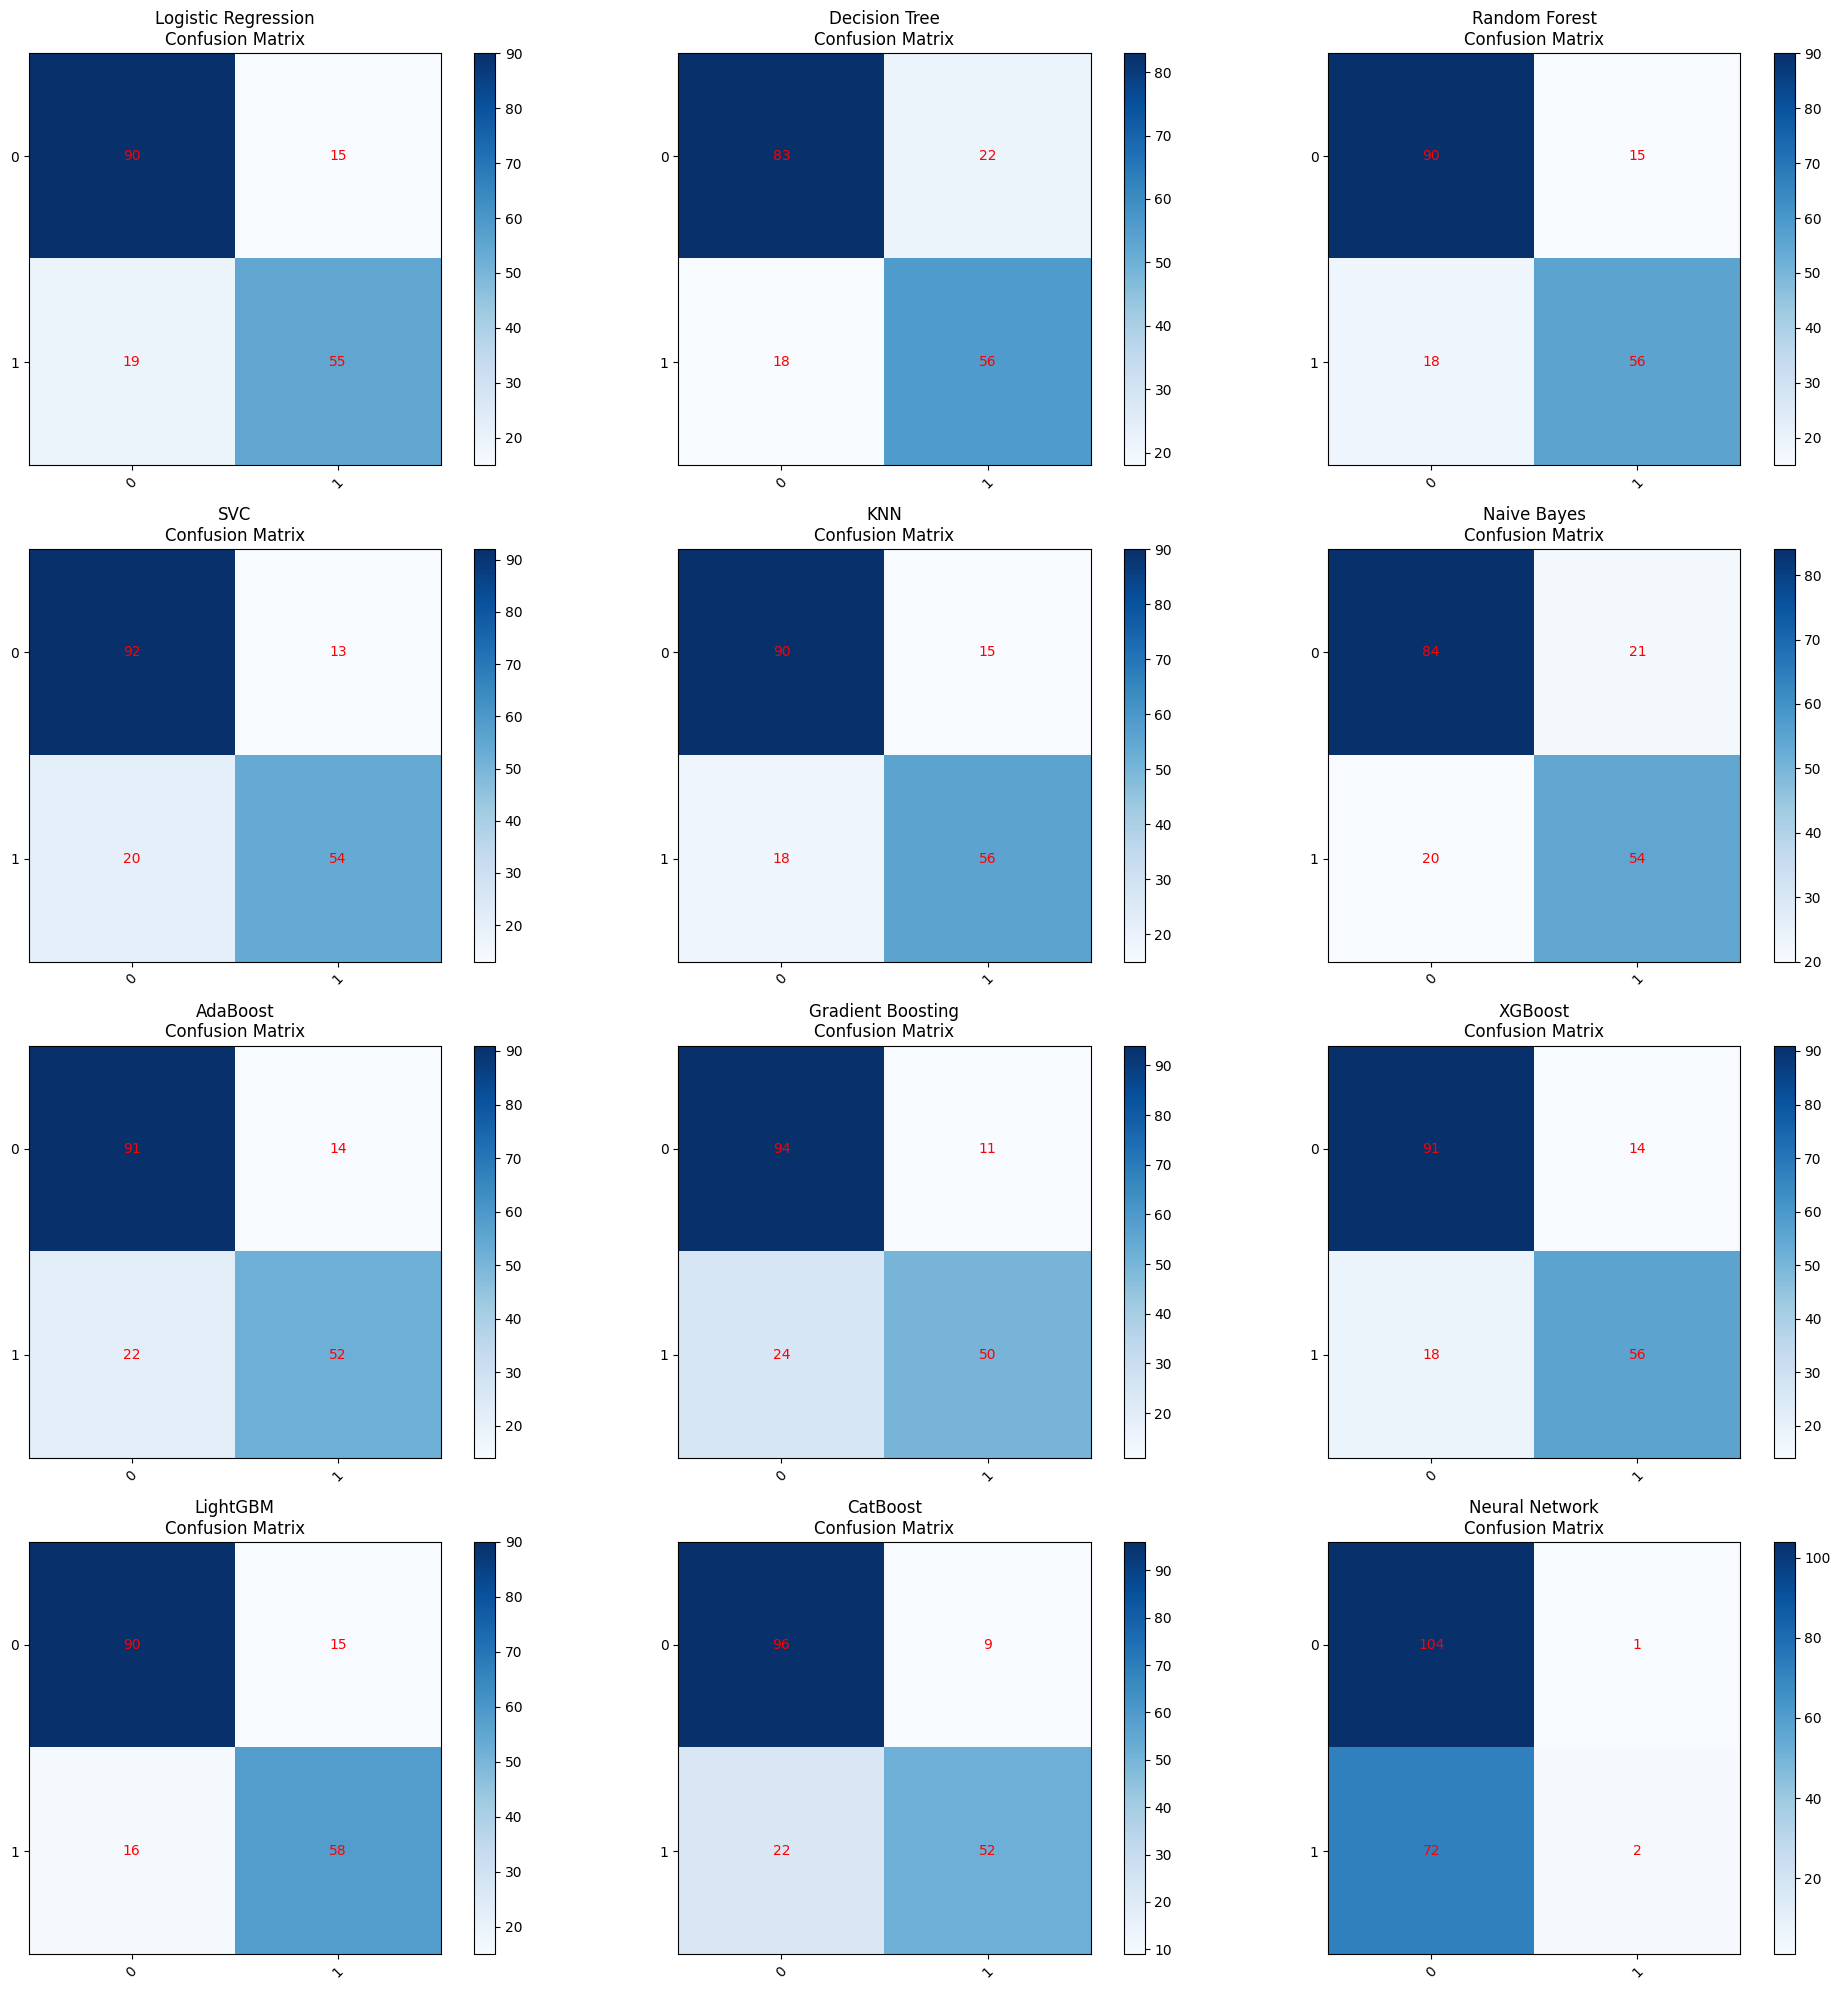

In [ ]:
# Initialize a figure for confusion matrices
plt.figure(figsize=(20, 20))
models_dir = "saved_models"
os.makedirs(models_dir, exist_ok=True)

# Train and evaluate each algorithm
for i, (name, model) in enumerate(algorithms.items()):
    print(f"Training {name}...")
    y_train_adjusted = y_train
    y_test_adjusted = y_test

    # Check if the model supports incremental learning
    if hasattr(model, 'partial_fit'):
        # Train incrementally using patches
        print(f"Training using patches.. {name}")
        for X_patch, y_patch in split_into_patches(X_train, y_train_adjusted, patch_size):
            model.partial_fit(X_patch, y_patch, classes=np.unique(y_train_adjusted))
    else:
        # Train on the entire dataset
        model.fit(X_train, y_train_adjusted)


    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test_adjusted, y_pred)
    precision = precision_score(y_test_adjusted, y_pred, average='weighted')
    recall = recall_score(y_test_adjusted, y_pred, average='weighted')
    f1 = f1_score(y_test_adjusted, y_pred, average='weighted')

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix in a subplot
    cm = confusion_matrix(y_test_adjusted, y_pred)
    plt.subplot(4, 3, i+1)  # 4 rows, 3 columns for 12 algorithms
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name}\nConfusion Matrix")
    plt.colorbar()

    # Get the number of unique classes in the target variable
    num_classes = len(np.unique(y_test_adjusted))

    tick_marks = np.arange(num_classes)  # Use num_classes instead of hardcoding 7
    plt.xticks(tick_marks, np.unique(y_test_adjusted), rotation=45) # Use unique class labels
    plt.yticks(tick_marks, np.unique(y_test_adjusted))  # Use unique class labels

    # Labeling the matrix - adjust loop ranges
    for j in range(cm.shape[0]): # Iterate over actual classes (rows)
        for k in range(cm.shape[1]): # Iterate over predicted classes (columns)
            plt.text(k, j, format(cm[j, k], 'd'), ha="center", va="center", color="red")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:

# Load the saved models
models_dir = "saved_models"
loaded_models = {}
for filename in os.listdir(models_dir):
    if filename.endswith(".joblib"):
        model_name = filename[:-7]  # Remove ".joblib" extension
        model_path = os.path.join(models_dir, filename)
        loaded_models[model_name] = joblib.load(model_path)

# Example new record (replace with your actual data)
new_record = pd.DataFrame({
    'Pclass': [3],
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Sex_male': [1],
    'Embarked_Q': [0],
    'Embarked_S': [1]
})

# Preprocess the new record (using the same preprocessing as training data)
numerical_cols = ['Age', 'Fare']

scaler = joblib.load('scaler.joblib') # Load scaler object if fitted before.
new_record[numerical_cols] = scaler.fit_transform(new_record[numerical_cols])


# Make predictions using each loaded model
for model_name, model in loaded_models.items():
    prediction = model.predict(new_record)
    print(f"Prediction from {model_name}: {prediction[0]}")

Prediction from Decision Tree: 0
Prediction from SVC: 0
Prediction from CatBoost: 0
Prediction from Gradient Boosting: 0
Prediction from Random Forest: 0
Prediction from AdaBoost: 0
Prediction from Logistic Regression: 0
Prediction from LightGBM: 0
Prediction from KNN: 0
Prediction from Neural Network: 0
Prediction from XGBoost: 0
Prediction from Naive Bayes: 0
